In [1]:
import string, re, json, pickle, warnings, random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# importing the wordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from bidi.algorithm import get_display
import arabic_reshaper
from data_preparation import take_a_shower, clean_content_aravec

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(0)

In [3]:
data = pd.read_csv('./data/offensive_dataset.csv', encoding="utf-16")
data.head()

,Comment,is_off
0,شوف حد ين*** أنت و إيران.,1
1,شوف تيفي قوداتها مع الجن غي بلاتي يجي من مكة,0
2,عجب يتفاوظون على شعوب عربية وعليهم وهىلا تعلم,0
3,ههههههه هاد شوف تيفي اللي حطت عليه مشا فيها,0
4,الرزق يأتي من حيث لا تدري 🙌🏻❤️,0


<AxesSubplot:xlabel='is_off', ylabel='count'>

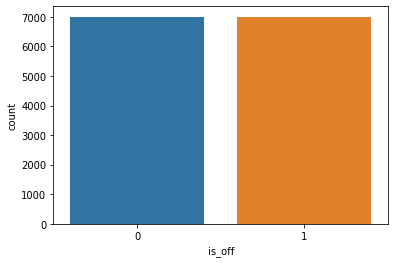

In [4]:
sns.countplot(x='is_off', data=data)

In [5]:
data.Comment = data.Comment.apply(take_a_shower)
data.shape

(14000, 2)

In [15]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM,Bidirectional, Activation, Dropout, Dense,Bidirectional, SpatialDropout1D, GlobalMaxPool1D
from keras.callbacks import ModelCheckpoint
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.regularizers import l1,l2

In [130]:
MAX_NB_WORDS = 10000
MAX_SEQUENCE_LENGTH = 100 #176 # based on our inputs; TODO: remove outliers? dynamically calculate!
EMBEDDING_DIM = 100 # w2v, fastText; GloVe=50

In [131]:
Y = np.asarray(data.is_off.values).astype('float32')
Y = Y.clip(0, 1)

In [132]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(data.Comment.values)

X = tokenizer.texts_to_sequences(data.Comment.values)
vocab_size = len(tokenizer.word_index) + 1
print("vocab size:", vocab_size)

print(X[50])

vocab size: 52003
[2389, 543, 2639, 1990, 1568, 5857, 1991]


In [133]:
X = pad_sequences(X, padding='post', maxlen=MAX_SEQUENCE_LENGTH)
print(X[50])

[2389  543 2639 1990 1568 5857 1991    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print('Train Set')
print(X_test, '\n')
print(y_test, '\n')
print('Test Set')
print(X_train, '\n')
print(y_train)

Train Set
[[4034 1536   65 ...    0    0    0]
 [5354 9058 7628 ...    0    0    0]
 [   6  315  754 ...    0    0    0]
 ...
 [   7  255  906 ...    0    0    0]
 [8635 2063 6604 ...    0    0    0]
 [ 167 7493   38 ...    0    0    0]] 

[1. 1. 1. ... 1. 1. 1.] 

Test Set
[[   0    0    0 ...    0    0    0]
 [7025 6464 1160 ...    0    0    0]
 [ 917 8678 9205 ...    0    0    0]
 ...
 [ 124   61   82 ...    0    0    0]
 [4994  872    1 ...    0    0    0]
 [   1 3580  143 ...    0    0    0]] 

[0. 0. 0. ... 0. 1. 1.]


In [135]:
print("Training:", len(X_train), len(y_train))
print("Testing: ", len(X_test), len(y_test))

Training: 11200 11200
Testing:  2800 2800


number of target in train set: 11200
number of samplse offensive class: 5584.0
number of samplse non-offensive class: 5616.0


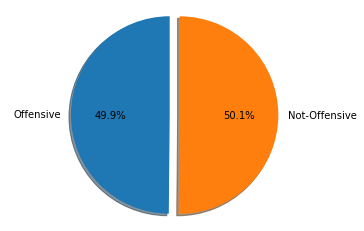

In [136]:
print('number of target in train set: {}'.format(len(y_train)))
print('number of samplse offensive class: {}'.format(sum(y_train)))
print('number of samplse non-offensive class: {}'.format(len(y_train)-sum(y_train)))
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Offensive', 'Not-Offensive'
sizes = [sum(y_train), len(y_train)-sum(y_train)]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

number of target in test set: 2800
number of samplse offensive class: 1416.0
number of samplse non-offensive class: 1384.0


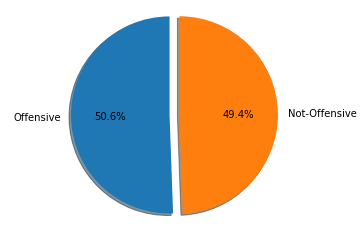

In [137]:
print('number of target in test set: {}'.format(len(y_test)))
print('number of samplse offensive class: {}'.format(sum(y_test)))
print('number of samplse non-offensive class: {}'.format(len(y_test)-sum(y_test)))
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Offensive', 'Not-Offensive'
sizes = [sum(y_test), len(y_test)-sum(y_test)]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [96]:
"""
Training Accuracy: 0.5014
Training Loss: 0.6933
-------------------------
Testing Accuracy:  0.4943
Testing Loss:  0.6935
"""
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [138]:
"""
Training Accuracy: 0.9377
Training Loss: 0.2238
-------------------------
Testing Accuracy:  0.7789
Testing Loss:  0.8032
"""
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.2))
model.add((LSTM(100, return_sequences = True))) #return_sequences = True
model.add(GlobalMaxPool1D())
model.add(Dense(80, activation="sigmoid"))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

In [151]:
"""
Training Accuracy: 0.9395
Training Loss: 0.2139
-------------------------
Testing Accuracy:  0.7939
Testing Loss:  0.7536
"""
model = Sequential()
model.add(Embedding(input_dim=MAX_NB_WORDS, output_dim=EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(LSTM(128, dropout=0.5, recurrent_dropout=0.5, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [126]:
"""
Training Accuracy: 0.9412
Training Loss: 0.2213
-------------------------
Testing Accuracy:  0.7829
Testing Loss:  0.8157
"""
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [152]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, 100, 100)          1000000   
_________________________________________________________________
lstm_31 (LSTM)               (None, 100, 128)          117248    
_________________________________________________________________
global_max_pooling1d_18 (Glo (None, 128)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_42 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_43 (Dropout)         (None, 64)              

In [153]:
save_best_acc = ModelCheckpoint("./models/lstm.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto', period=1,save_weights_only=False)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=32, callbacks=[save_best_acc])

Epoch 1/5
280/280 [==============================] - ETA: 0s - loss: 0.6130 - accuracy: 0.6379
Epoch 00001: val_accuracy improved from -inf to 0.76964, saving model to ./models/lstm.hdf5
280/280 [==============================] - 38s 136ms/step - loss: 0.6130 - accuracy: 0.6379 - val_loss: 0.4621 - val_accuracy: 0.7696
Epoch 2/5
280/280 [==============================] - ETA: 0s - loss: 0.3668 - accuracy: 0.8539
Epoch 00002: val_accuracy improved from 0.76964 to 0.78795, saving model to ./models/lstm.hdf5
280/280 [==============================] - 38s 136ms/step - loss: 0.3668 - accuracy: 0.8539 - val_loss: 0.4616 - val_accuracy: 0.7879
Epoch 3/5
280/280 [==============================] - ETA: 0s - loss: 0.2350 - accuracy: 0.9182
Epoch 00003: val_accuracy did not improve from 0.78795
280/280 [==============================] - 38s 135ms/step - loss: 0.2350 - accuracy: 0.9182 - val_loss: 0.5349 - val_accuracy: 0.7683
Epoch 4/5
280/280 [==============================] - ETA: 0s - loss: 0.

In [154]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))
loss_val, accuracy_val = model.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy_val))
print("Testing Loss:  {:.4f}".format(loss_val))

350/350 [==============================] - 9s 26ms/step - loss: 0.2503 - accuracy: 0.9385
Training Accuracy: 0.9385
Training Loss: 0.2503
88/88 [==============================] - 2s 26ms/step - loss: 0.9377 - accuracy: 0.7989
Testing Accuracy:  0.7989
Testing Loss:  0.9377


In [90]:
y_pred = model.predict(X_test, batch_size=32, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
y_pred = (y_pred > 0.5)

print(classification_report(np.array(y_test), y_pred))

88/88 [==============================] - 6s 66ms/step
              precision    recall  f1-score   support

         0.0       0.81      0.70      0.75      1384
         1.0       0.74      0.84      0.79      1416

    accuracy                           0.77      2800
   macro avg       0.78      0.77      0.77      2800
weighted avg       0.78      0.77      0.77      2800



In [21]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

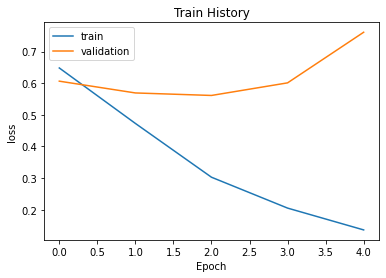

In [110]:
#train loss vs validation loss
show_train_history(history,'loss','val_loss')

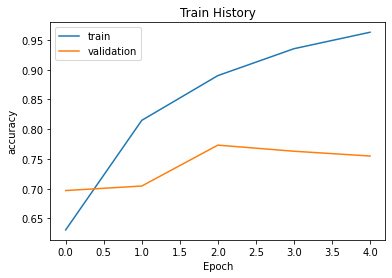

In [109]:
show_train_history(history,'accuracy','val_accuracy')